In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("../data/processed/kidneyData_processed.csv")

df.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
1,1,Tumor- (83),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
2,2,Tumor- (580),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
3,3,Tumor- (1701),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
4,4,Tumor- (1220),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor


In [5]:
df.shape

(12446, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [7]:
df.describe()

,Unnamed: 0,target
count,12446.00000,12446.000000
mean,6222.50000,1.179495
std,3592.99506,1.053682
min,0.00000,0.000000
25%,3111.25000,0.000000
50%,6222.50000,1.000000
75%,9333.75000,2.000000
max,12445.00000,3.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
image_id      0
path          0
diag          0
target        0
Class         0
dtype: int64

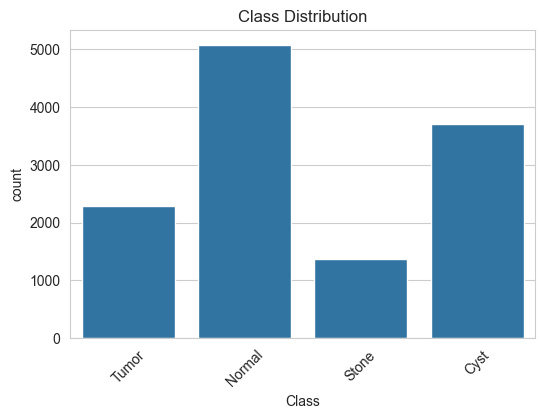

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Class")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [10]:
df["Class"].value_counts(normalize=True) * 100

Class
Normal    40.792222
Cyst      29.800739
Tumor     18.343243
Stone     11.063796
Name: proportion, dtype: float64

In [12]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/sahilshrivastava/Documents/Potato Disease Classification/my_dl_project/notebooks


In [14]:
df = pd.read_csv("../data/processed/kidneyData_processed.csv")

df.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
1,1,Tumor- (83),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
2,2,Tumor- (580),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
3,3,Tumor- (1701),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor
4,4,Tumor- (1220),"CT KIDNEY DATASET Normal, CYST, TUMOR and STON...",Tumor,3,Tumor


In [41]:
# Replace incorrect base path with correct folder
df["path"] = df["path"].str.replace(
    r"^CT KIDNEY DATASET Normal, CYST, TUMOR and STONE", 
    "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
    regex=True
)

Project root: /Users/sahilshrivastava/Documents/Potato Disease Classification/my_dl_project


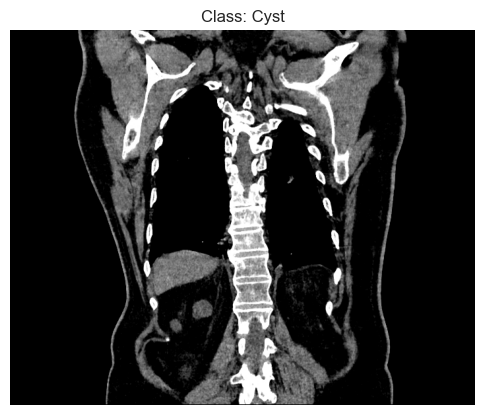

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define project root
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
print("Project root:", PROJECT_ROOT)

# Example image path from your dataset (relative to project root)
relative_path = "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg"

# Convert to absolute path
img_path = os.path.abspath(os.path.join(PROJECT_ROOT, relative_path))

# Check if the file exists
if os.path.exists(img_path):
    img = Image.open(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Class: Cyst")
    plt.axis("off")
    plt.show()
else:
    print(f"File not found: {img_path}")

Project root: /Users/sahilshrivastava/Documents/Potato Disease Classification/my_dl_project
Showing samples for class: Tumor


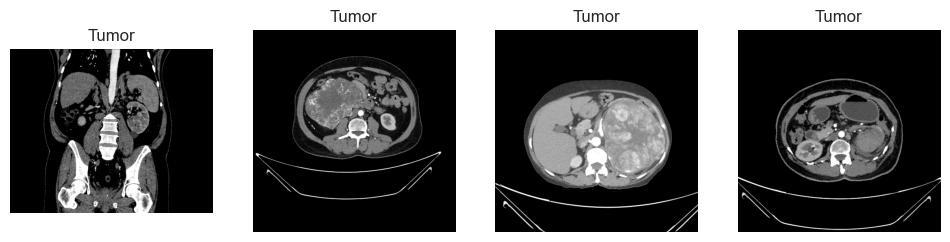

Showing samples for class: Normal


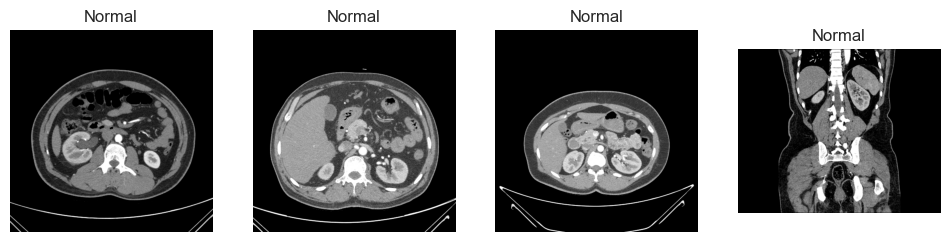

Showing samples for class: Stone


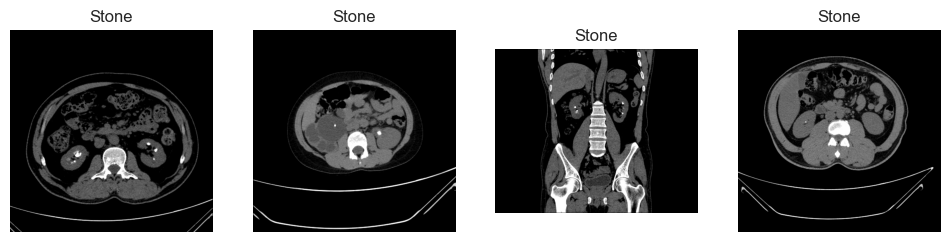

Showing samples for class: Cyst


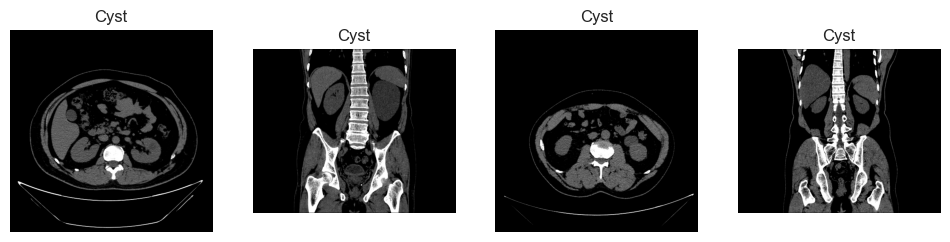

In [43]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Project root
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
print("Project root:", PROJECT_ROOT)

def show_samples(class_name, n=4):
    """
    Show up to n images for a given class from the dataframe df.
    """
    # Take first n samples for the class
    sample = df[df["Class"] == class_name].head(n)
    
    # Collect valid image paths
    images_to_show = []
    for row in sample.itertuples():
        img_path = row.path
        if not os.path.isabs(img_path):
            img_path = os.path.abspath(os.path.join(PROJECT_ROOT, img_path))
        
        if os.path.exists(img_path):
            images_to_show.append(img_path)
        else:
            print(f"File not found: {img_path}")

    n_samples = len(images_to_show)
    if n_samples == 0:
        print(f"No images found for class {class_name}")
        return

    # Plot images
    plt.figure(figsize=(3 * n_samples, 4))
    for i, img_path in enumerate(images_to_show):
        plt.subplot(1, n_samples, i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
    
    plt.show()

# Loop over all classes
for cls in df["Class"].unique():
    print(f"Showing samples for class: {cls}")
    show_samples(cls, n=4)  # show max 4 images per class

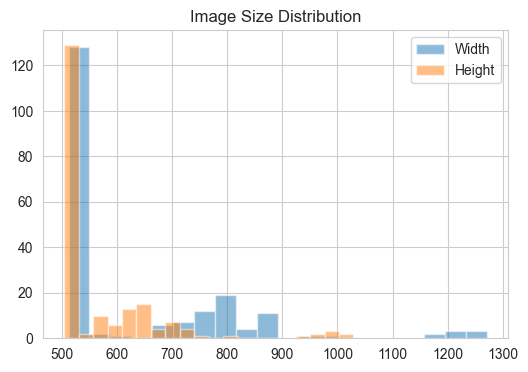

Average Width: 626.215
Average Height: 570.3


In [45]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

widths = []
heights = []

# Take a random sample of up to 200 images
sample_paths = df["path"].sample(min(200, len(df)))

for path in sample_paths:
    # Handle relative paths
    if not os.path.isabs(path):
        img_path = os.path.abspath(os.path.join(PROJECT_ROOT, path))
    else:
        img_path = path

    # Skip missing files
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        continue

    img = Image.open(img_path)
    widths.append(img.size[0])
    heights.append(img.size[1])

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(widths, bins=20, alpha=0.5, label="Width")
plt.hist(heights, bins=20, alpha=0.5, label="Height")
plt.legend()
plt.title("Image Size Distribution")
plt.show()

# Print average size
print("Average Width:", np.mean(widths))
print("Average Height:", np.mean(heights))

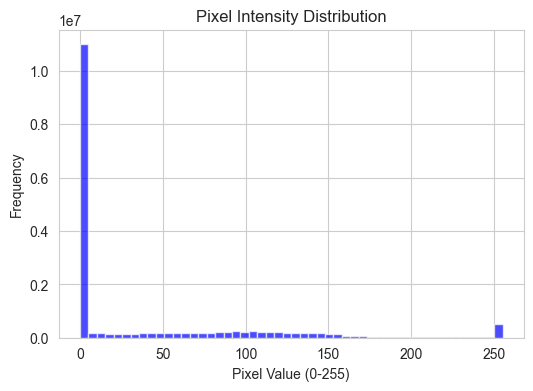

In [46]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Sample a few images (e.g., 50)
sample_paths = df["path"].sample(min(50, len(df)))

pixel_values = []

for path in sample_paths:
    img_path = os.path.join(PROJECT_ROOT, path) if not os.path.isabs(path) else path
    if os.path.exists(img_path):
        img = Image.open(img_path).convert("L")  # convert to grayscale
        pixel_values.extend(np.array(img).flatten())

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(pixel_values, bins=50, color="blue", alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Frequency")
plt.show()

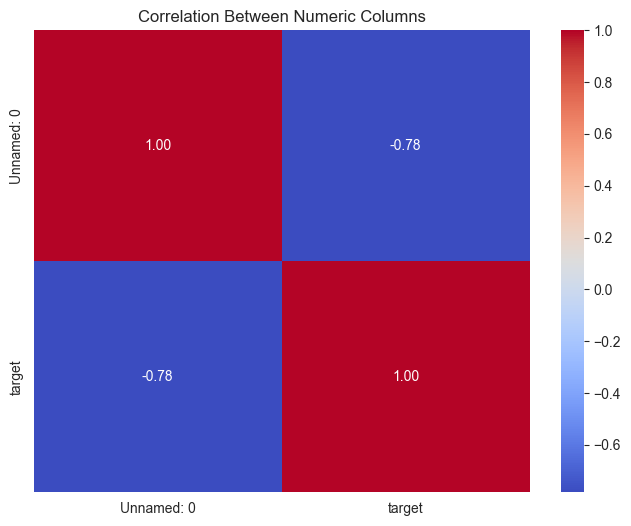

In [47]:
import seaborn as sns

# Compute correlation
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Numeric Columns")
plt.show()